In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Calculate number of FTs created by a genetic operator that has passed to the next generation.

In [2]:
def all_dataframes(list_df):
    data_x = {}
    data_y = {}
    
    for df in list_df:
        generations = df['Generation'].unique()
        generations.sort()
        
        for operator in df['Operator'].unique():
            x = []
            y = []
            
            for i in range(len(generations)):
                subset_of_generation = df[df['Generation'] == i]
                subset_of_generation = subset_of_generation[subset_of_generation['Passed'] == 1]
                x.append(generations[i])
                y.append(len(subset_of_generation[subset_of_generation['Operator'] == operator])/400)

            if operator not in data_x:
                data_x[operator] = []
                data_y[operator] = []
                
            data_x[operator].append(x)
            data_y[operator].append(y)
            
                
    data_agg_x = {}
    data_agg_y = {}
                
    for operator in data_x.keys():
        x_list = data_x[operator]
        y_list = data_y[operator]
            
        intersection = set(x_list[0])
        for x in x_list[1:]:
            intersection.intersection_update(x)

        data_agg_x[operator] = list(intersection)
        
        y_agg = []
        for x in data_agg_x[operator]:
            agg = []
            
            for y in y_list:
                agg.append(y[x])
                
            y_agg.append(agg)
            
        data_agg_y[operator] = y_agg
    
    return data_agg_x , data_agg_y
    
    
def graph(list_df):
    data_agg_x , data_agg_y = all_dataframes(list_df)
    
    color_map = {
        'disconnect_be': 'blue',
        'delete_be': 'green',
        'create_gate': 'red',
        'change_gate_type': 'purple',
        'create_be': 'orange',
        'cross_over': 'brown',
        'delete_gate': 'pink',
        'connect_be': 'gray',
        'move_be': 'cyan',
        'do_nothing' : 'black'
    } 
    
    df = list_df[0]
    plt.figure(figsize=(8, 8))
    
    for operator in df['Operator'].unique():
        x = []
        generations = data_agg_x[operator]
        mean = []
        median = []
        std = []
        
        for i in range(len(generations)):
            x.append(generations[i])
            mean.append(np.mean(data_agg_y[operator][generations[i]]))
            median.append(np.median(data_agg_y[operator][generations[i]]))
            std.append(np.std(data_agg_y[operator][generations[i]]))
   
        plt.plot(x, mean, label=f'{operator}', color=color_map.get(operator, 'black'))
        
        plt.fill_between(x, np.array(mean) - np.array(std), np.array(mean) + np.array(std), 
                        color=color_map.get(operator, 'black'), alpha=0.2)
        
        plt.plot(x, median, color=color_map.get(operator, 'black'), linestyle=':')
    
            
    plt.xlabel('Generation')
    plt.ylabel(f'Percentage of successful operators')
    plt.title(f'Percentage of successful operators by Generation and Operator (x5)')
    plt.legend(title='Operator')
    plt.grid(True)
    plt.show()
    plt.close()

In order to plot the results, we need to run the following code:

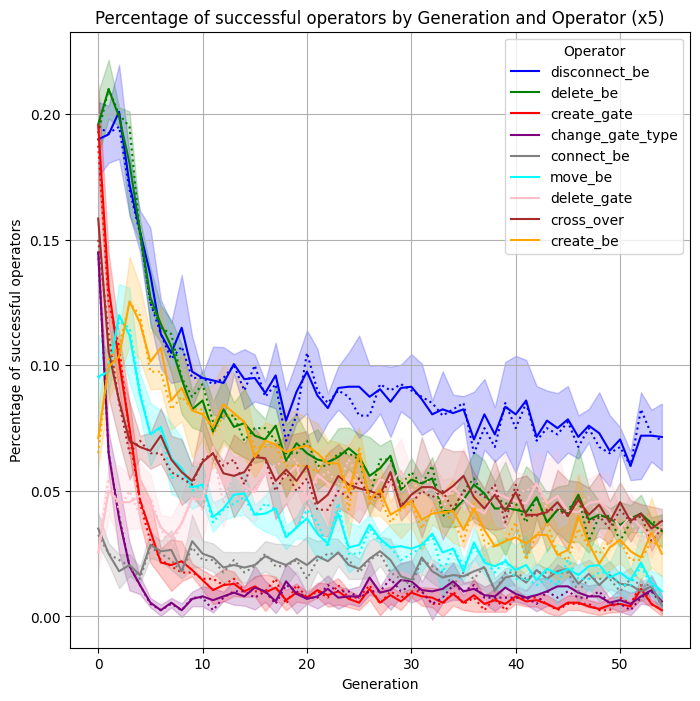

In [3]:
# Write the folder with the dataframes. 
# The dataframes should be in the format of the ones saved by the learn_ft.py script
# The default folder, where the required data frames for this test are saved, is: saved_data_frames/difference
folder_path = '..\\saved_data_frames\\difference\\COVID_19'


file_list = os.listdir(folder_path)
dataframes = []
filename = os.path.basename(os.path.normpath(folder_path))
for file_name in file_list:
    if file_name.endswith('.pkl'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_pickle(file_path)
        dataframes.append(df)   
graph(dataframes)